In [1]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)


In [123]:
x=np.arange(0,100)/10
y=np.square(x)

In [121]:
import matplotlib.pyplot as plt

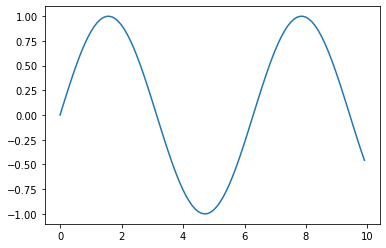

In [45]:
plt.plot(x,y)
y1=y
y1[0]=0
y1[1:]=y[:99]

In [46]:
data=np.vstack([x,y,y1]).T


In [47]:
#data.shape

In [48]:
np.random.shuffle(data)

In [49]:
data=data.T

In [50]:
#data.shape

In [51]:
#plt.plot(data[0],data[1])

In [52]:
weights=35
generalization_factor=[i for i in range(weights)]

In [109]:

class Model():
    def __init__(self,data):
        self.prev_op_for_ip=0
        self.weights_x=np.ones((35,1))
        self.weights_y=np.ones((35,1))
        self.gen_factor=5
        self.x=data[0]
        self.y=data[1]
        self.y1=data[2]
        
        self.min_x=0
        self.max_x=10
        self.min_y=min(self.y)
        self.max_y=100
        
        self.weights_no=35
        self.lr=0.001
        self.total_loss=0
        self.total_prev_loss=0
        self.prev_loss=0
        self.total_loss=0
        #self.dict_for_A_x={}
        #self.dict_for_A_y={}
        
        self.ypred_list=[]
        #self.y_=x[1]
        
        self.epochs=10000
        #print([i for i in self.x])
        #self.trial=int(np.floor((no_vector)*((i-self.min)/(self.min-self.max))))
        self.mapping_x,self.dict_for_A_x=self.mapping_fn(self.gen_factor,0)#np.zeros((35,100))
        self.mapping_y,self.dict_for_A_y=self.mapping_fn(self.gen_factor,1)#np.zeros((35,100))


    def mapping_fn(self,gn,type_):
        if type_==0:
            iter_data=self.x
            min_=self.min_x
            max_=self.max_x
            print('x')
        elif type_==1:
            print('y')
            iter_data=self.y
            min_=self.min_y
            max_=self.max_y
        dict_for_A={}
        #print(iter_data.shape)
        no_vector=self.weights_no-self.gen_factor+1
        self.no_vector=no_vector
        mapp=np.zeros((no_vector,self.weights_no))
        print(max_)
        for i in iter_data:
            #print(i)
            # if(i<self.min):
            #     index=0
            #     #index=(no_vector)*((i-self.min)/(self.min-self.max))
            #     mapp[:,index:index+self.gen_factor]=1
            #     #return mapp
            # if(i>self.max):
            #     index=34-self.gen_factor
            #     #index=(no_vector)*((i-self.min)/(self.min-self.max))
            #     #print('0')
            #     mapp[:,index:index+self.gen_factor]=1
            #     #return mapp
            # else:
                index=int(np.floor((no_vector)*((i-min_)/(max_-min_))))
                #print(index)
                dict_for_A[i]=index
                mapp[index,index:index+self.gen_factor]=1
        return mapp,dict_for_A
    def predict(self,x_A,y_A):
        self.x_A_trail=x_A
        return x_A@self.weights_x+ y_A@self.weights_y
    def predict_prev(self,x_A,):
        self.x_A_trail=x_A
        return x_A@self.weights_x
    
    def loss_fn(self,y_train,y_pred):
        #print(y_train)
        return (y_train- y_pred)
    
    def backprop(self,x,y,loss):
        weights_x=self.weights_x.copy()
        weights_y=self.weights_y.copy()
        #self.trail_type=type(weights)
        if len(weights_x.shape)==2:
        
            weights_x=np.reshape(weights_x,(weights_x.shape[0]))
        if len(weights_y.shape)==2:
        
            weights_y=np.reshape(weights_y,(weights_y.shape[0]))
        #print('shape_a_x- ',x.shape)
        #print('shape_weights- ',weights.shape)
        #self.weights_trial=weights*self.lr
        
        #self.trial_loss=loss 
        weights_x= weights_x+loss*weights_x*x*self.lr 
        weights_x=np.reshape(weights_x,self.weights_x.shape)
        self.weights_x=weights_x
        
        weights_y= weights_y+loss*weights_y*y*self.lr 
        weights_y=np.reshape(weights_y,self.weights_y.shape)
        self.weights_y=weights_y
        
        #return weights 
    
    def val_step(self,x,y,p_y):
        weights=self.weights_y
        
        y_pred=self.predict(x,p_y)
        self.prev_op_for_ip=round(y_pred[0])
        self.ypred_list.append(y_pred)
        loss=self.loss_fn(y,y_pred)
        self.total_loss+=loss
    def train_step(self,x,y,p_y):
        
        weights=self.weights_x
        y_pred=self.predict(x,p_y)
        self.prev_op_for_ip=round(y_pred[0])
        self.ypred_list.append(y_pred)
        #print(y_pred)
        loss=self.loss_fn(y,y_pred)
        #self.total_loss+=loss
        self.backprop(x,p_y,loss)
    def fit(self):
        self.total_prev_loss=self.total_loss
        epochs=self.epochs
        for e in range(epochs):
            self.total_prev_loss=self.total_loss
            self.total_loss=0
            self.ypred_list=[]
            for ip,op,yp in zip(data[0,:70],data[1,:70],data[2,:70]):
                #print(np.round(ip-1,1))
                x_train=self.dict_for_A_x[ip]
                x_train=self.mapping_x[x_train,:]
                if(ip-1)<0:
                    ip=1
                x_prev=self.dict_for_A_x[np.round(ip-1,1)]
                x_prev=self.mapping_x[x_prev,:]
                prev_yt=self.predict_prev(x_prev)
                prev_yt=int(np.floor((self.no_vector)*((prev_yt-self.min_y)/(self.max_y-self.min_y))))
                prev_yt=self.mapping_y[prev_yt,:]
                y_train=op
                self.train_step(x_train,y_train,prev_yt)
                self.trial=x_train
                #y_train=self.dict_for_A[op]
                
                #print(y_train)
                #self.train_step(x_train,y_train,prev_yt)
            for ip,op in zip(data[0,70:],data[1,70:]):
                x_train=self.dict_for_A_x[ip]
                x_train=self.mapping_x[x_train,:]
                if(ip-1)<0:
                    ip=1
                x_prev=self.dict_for_A_x[np.round(ip-1,1)]
                x_prev=self.mapping_x[x_prev,:]
                prev_yt=self.predict_prev(x_prev)
                prev_yt=int(np.floor((self.no_vector)*((prev_yt-self.min_y)/(self.max_y-self.min_y))))
                prev_yt=self.mapping_y[prev_yt,:]
                #y_train=self.dict_for_A[op]
                y_train=op
                self.val_step(x_train,y_train,prev_yt)
            error=self.error(np.array(self.ypred_list_v),data[1,70:])
            print('epoch:',e,' accuracy =',1-(error))     
            if self.is_converged():
                print('converge')
                break
    def is_converged(self):
        if np.abs(self.total_prev_loss-self.total_loss)<0.00001:
            return True 
        else:
            return False
        

In [110]:
model=Model(data)
model.fit()
#model.trial_loss
#model.x[1]
#model.mapping.shape
#print(model.mapping)
#data[0,:70]

x
10
y
100
converge


In [111]:
data[1].shape

(100,)

In [112]:
len(model.ypred_list)

100

In [113]:
x1=np.array(model.ypred_list).reshape(100)
data_pred=np.vstack([data[0],x1])

data1=data_pred.copy().T
data1=data1[(data1[:,0]).argsort()]
data1=data1.T

In [114]:
data1.shape

(2, 100)

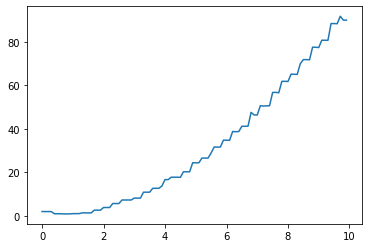

In [119]:
plt.plot(data1[0],data1[1])

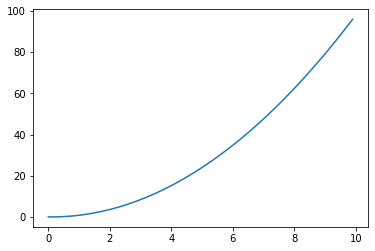

In [117]:
data_pred=np.vstack([data[0],x])

datat=data.copy().T
datat=datat[(datat[:,0]).argsort()]
datat=datat.T
plt.plot(datat[0],datat[1])

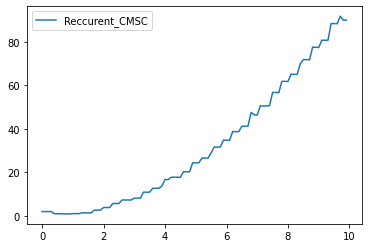

In [125]:
#plt.plot(x,y,label='Dataset')
plt.plot(data1[0],data1[1],label='Reccurent_CMSC')
plt.legend()

In [455]:
min_=0
max_=99
no_vector=7
index=int(np.floor((no_vector)*((i-min_)/(min_-max_))))

In [375]:
zss={}
zss[0]=1
zss[1]=2
zss

{0: 1, 1: 2}

In [199]:
x[0]=1
#z[1]=1
#y[2]=1
data1=data.copy().T
data1=data1[(data1[:,1]).argsort()]
data1=data.T

In [200]:
arr = np.array([[-0.30565392, -0.96605562],
                [ 0.85331367, -2.62963495],
                [ 0.87839643, -0.28283675],
                [ 0.72676698,  0.93213482],
                [-0.52007354,  0.27752806],
                [-0.08701666,  0.22764316],
                [-1.78897817,  0.50737573],
                [ 0.62260038, -1.96012161],
                [-1.98231706,  0.36523876],
                [-1.07587382, -2.3022289 ]])

In [324]:
data[0].reshape((1,len(data[0])))

array([[94, 88,  8, 91, 36, 37, 93, 33, 53, 59, 82, 12, 76, 50,  1, 34,
        23, 18, 86, 40, 27, 65, 51, 19, 89, 41, 96,  3, 14, 55, 16,  2,
        83, 77, 70, 43, 71, 21, 28, 25, 85,  9, 97, 75, 80, 87, 32, 17,
        26, 69, 57, 38, 11, 29, 56, 47, 49, 81, 98, 42, 78, 31, 73, 45,
        46, 54, 66,  7, 67, 15, 13, 90, 30, 61,  5, 24, 68, 92, 84,  0,
        52, 64, 35, 44, 39, 62, 58, 74, 95, 60, 99, 20, 48,  6, 63, 22,
        10,  4, 72, 79]])

In [521]:
y=np.ones(3)
x=np.zeros(3)
x[2]=1
y.shape

(3,)

In [520]:
y*x

array([0., 0., 1.])

In [105]:
len(x.shape)

2

In [106]:
mapping=np.zeros((35,100))

In [108]:
mapping.shape

(35, 100)

In [110]:
mapping[:,0].shape

(35,)

In [460]:
   index=int(np.floor((no_vector)*((i-self.min)/(self.min-self.max))))
                self.dict_for_A[i]=index
                mapp[index,index:index+self.gen_factor]=1
no_vec=7-3+1
mapp=np.zeros((5,7))
for i in range(0,10):

    index=int(np.floor((no_vec)*((i)/(10))))
    mapp[index,index:index+3]=1

In [461]:
mapp

array([[1., 1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1.]])

In [180]:
for i,j in zip(data[0],data[1]):
    print(i,j)

28 784
20 400
38 1444
85 7225
74 5476
96 9216
59 3481
60 3600
13 169
1 1
37 1369
36 1296
67 4489
53 2809
98 9604
29 841
30 900
18 324
72 5184
55 3025
66 4356
41 1681
81 6561
52 2704
17 289
87 7569
56 3136
40 1600
62 3844
44 1936
80 6400
3 9
34 1156
50 2500
22 484
43 1849
31 961
46 2116
86 7396
45 2025
16 256
90 8100
70 4900
82 6724
7 49
88 7744
6 36
91 8281
64 4096
61 3721
77 5929
26 676
97 9409
83 6889
58 3364
54 2916
99 9801
2 4
51 2601
9 81
0 0
79 6241
42 1764
14 196
39 1521
33 1089
5 25
21 441
12 144
23 529
65 4225
92 8464
68 4624
89 7921
69 4761
49 2401
27 729
78 6084
11 121
10 100
47 2209
57 3249
75 5625
93 8649
4 16
8 64
95 9025
71 5041
19 361
48 2304
63 3969
73 5329
24 576
25 625
84 7056
32 1024
94 8836
35 1225
15 225
76 5776


In [176]:
data

array([[  28,   20,   38,   85,   74,   96,   59,   60,   13,    1,   37,
          36,   67,   53,   98,   29,   30,   18,   72,   55,   66,   41,
          81,   52,   17,   87,   56,   40,   62,   44,   80,    3,   34,
          50,   22,   43,   31,   46,   86,   45,   16,   90,   70,   82,
           7,   88,    6,   91,   64,   61,   77,   26,   97,   83,   58,
          54,   99,    2,   51,    9,    0,   79,   42,   14,   39,   33,
           5,   21,   12,   23,   65,   92,   68,   89,   69,   49,   27,
          78,   11,   10,   47,   57,   75,   93,    4,    8,   95,   71,
          19,   48,   63,   73,   24,   25,   84,   32,   94,   35,   15,
          76],
       [ 784,  400, 1444, 7225, 5476, 9216, 3481, 3600,  169,    1, 1369,
        1296, 4489, 2809, 9604,  841,  900,  324, 5184, 3025, 4356, 1681,
        6561, 2704,  289, 7569, 3136, 1600, 3844, 1936, 6400,    9, 1156,
        2500,  484, 1849,  961, 2116, 7396, 2025,  256, 8100, 4900, 6724,
          49, 7744,   3